In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
import numpy as np
import os,re,glob,cv2
import PIL
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.applications import ResNet50
from tensorflow import keras

In [111]:
image_datas = glob.glob('/content/drive/MyDrive/CV/dataset/*/*.png')
categories = ["spring","summer","autumn","winter"] 
dic = {"spring":0,"summer":1,"autumn":2,"winter":3}

image_w = 64
image_h = 64

X = []
Y = []

for imagename in image_datas:
  image = Image.open(imagename)
  image = image.resize((128,128))
  image = np.array(image)
  X.append(image)
  label = imagename.split('/')[6]
  print(label)
  label = dic[label]
  Y.append(label)

spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring
spring

In [112]:
X = np.array(X)
Y = np.array(Y)

In [113]:
train_images, test_images, train_labels, test_labels = train_test_split(X,Y,test_size=0.1, shuffle=True, random_state=44)

train_labels = train_labels[...,tf.newaxis]
test_labels = test_labels[...,tf.newaxis]

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((2445, 128, 128, 3), (2445, 1), (272, 128, 128, 3), (272, 1))

In [114]:
# train data class별 image 수
unique, counts = np.unique(np.reshape(train_labels,(2445,)),axis=-1, return_counts=True)
dict(zip(unique,counts))

{0: 516, 1: 1440, 2: 51, 3: 438}

In [116]:
# test data class별 image 수
unique, counts = np.unique(np.reshape(test_labels,(272,)),axis=-1, return_counts=True)
dict(zip(unique,counts))

{0: 51, 1: 151, 2: 16, 3: 54}

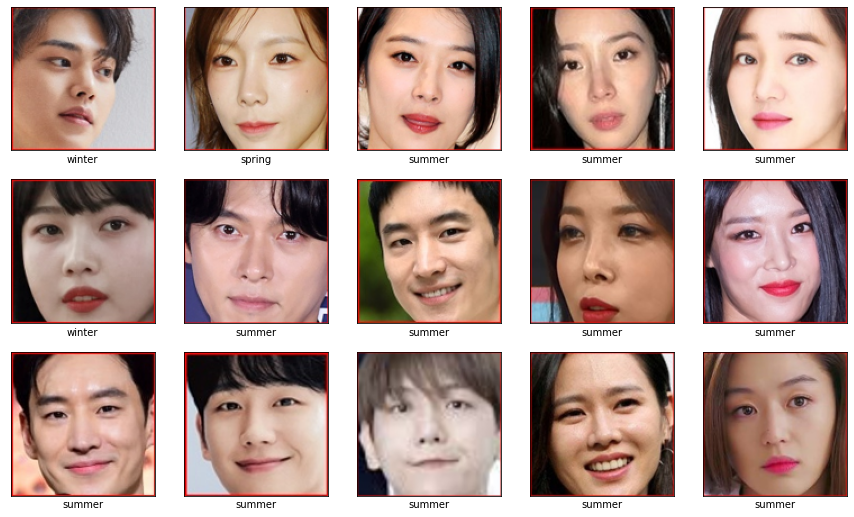

In [118]:
# data 확인
plt.figure(figsize=(15,9))
for i in range(15):
  img_idx = np.random.randint(0,2445)
  plt.subplot(3,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[img_idx])
  plt.xlabel(categories[train_labels[img_idx][0]])

In [119]:
# pixel값을 0~1사이 범위로 조정

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

# label을 onehot-encoding
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

In [120]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(2445, 128, 128, 3) (2445, 4)
(272, 128, 128, 3) (272, 4)


In [121]:
# 하이퍼 파라미터
learning_rate = 0.01
epochs = 10
batch_size = 64
category = 4

In [122]:
# resnet
model = keras.Sequential()
model.add(ResNet50(include_top=True, weights=None, input_shape=(128, 128, 3), classes=4))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4)                 23595908  
                                                                 
Total params: 23,595,908
Trainable params: 23,542,788
Non-trainable params: 53,120
_________________________________________________________________


In [123]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

In [124]:
history = model.fit(train_images,train_labels, 
                    batch_size=batch_size, epochs=epochs, 
                    validation_data = (test_images, test_labels))

Epoch 1/10
39/39 [==============================] - 679s 17s/step - loss: 1.4693 - accuracy: 0.5493 - val_loss: 1.9546 - val_accuracy: 0.1985
Epoch 2/10
39/39 [==============================] - 626s 16s/step - loss: 0.7372 - accuracy: 0.7125 - val_loss: 2.2909 - val_accuracy: 0.5551
Epoch 3/10
39/39 [==============================] - 612s 16s/step - loss: 0.4977 - accuracy: 0.8094 - val_loss: 4.0983 - val_accuracy: 0.5551
Epoch 4/10
39/39 [==============================] - 589s 15s/step - loss: 0.6102 - accuracy: 0.8025 - val_loss: 4.5395 - val_accuracy: 0.5551
Epoch 5/10
39/39 [==============================] - 607s 16s/step - loss: 0.2946 - accuracy: 0.8875 - val_loss: 4.9966 - val_accuracy: 0.5551
Epoch 6/10
39/39 [==============================] - 602s 15s/step - loss: 0.4908 - accuracy: 0.8282 - val_loss: 5.7091 - val_accuracy: 0.5551
Epoch 7/10
39/39 [==============================] - 604s 15s/step - loss: 0.3833 - accuracy: 0.8552 - val_loss: 3.9346 - val_accuracy: 0.5625
Epoch 

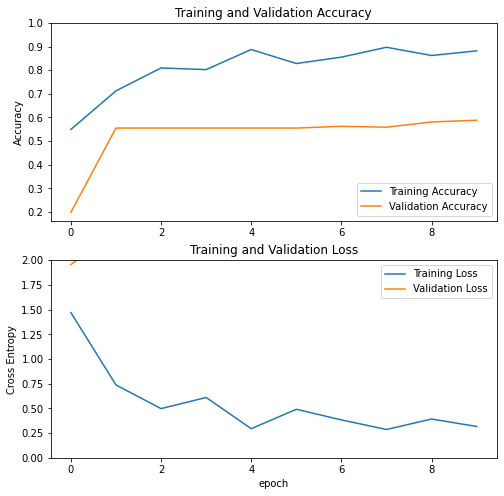

In [125]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,2.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [138]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=keras.utils.load_img(path, target_size=(128, 128))

  x=keras.utils.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=batch_size)
  for i in range(0,4,1) :
    print(categories[i], "=", classes[0][i])
  print("예측한 결과 = " , categories[classes.argmax()])

Saving 032 복사본.png to 032 복사본 (1).png
1/1 [==============================] - 0s 95ms/step
spring = 0.0
summer = 0.0
autumn = 1.0
winter = 0.0
예측한 결과 =  autumn
